In [1]:
# Importing required librries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

In [2]:
data = pd.read_csv('anaconda3/Online Shop Customer Sales Data.csv')

#Understand Data Set#

In [3]:
data.columns

Index([u'Customer_id', u'Age', u'Gender', u'Revenue_Total', u'N_Purchases',
       u'Purchase_DATE', u'Purchase_VALUE', u'Pay_Method', u'Time_Spent',
       u'Browser', u'Newsletter', u'Voucher'],
      dtype='object')

Cell Descriptions: 

- Customer_id: A unique identifier for each customer.
- Age: The age of the customer.
- Gender: A binary variable where 0 represents male and 1 represents female.
- Revenue_Total: Total sales revenue by the customer.
- N_Purchases: The number of purchases made by the customer to date.
- Purchase_DATE: The date of the latest purchase made by the customer.
- Purchase_VALUE: The value of the latest purchase made by the customer in euros.
- Pay_Method: A categorical variable indicating the payment method used by the customer. The - - categories are digital wallets, card, PayPal, and other.
- Time_Spent: The time spent by the customer on the website in seconds.
- Browser: A categorical variable indicating the browser used by the customer. The categories are Chrome, Safari, Edge, and other.
- Newsletter: A binary variable indicating whether the customer is subscribed to the newsletter or not.
- Voucher: A binary variable indicating whether the customer has used a voucher or not.

In [4]:
data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [5]:
data.tail()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0
65795,570103,25,0,5.3,2,23.10.21,2.968,0,820,0,0,0


In [6]:
print(data['Age'].dtype)
print(data['Age'].describe())

int64
count    65796.000000
mean        39.592696
std         13.825466
min         16.000000
25%         28.000000
50%         40.000000
75%         51.000000
max         63.000000
Name: Age, dtype: float64


Customer Demographics
- Number of Distinct: 65,796
- Minimum Age: 16
- Maximum Age: 63
- Median Age 40
- Mean Age 39.6




Visualize 

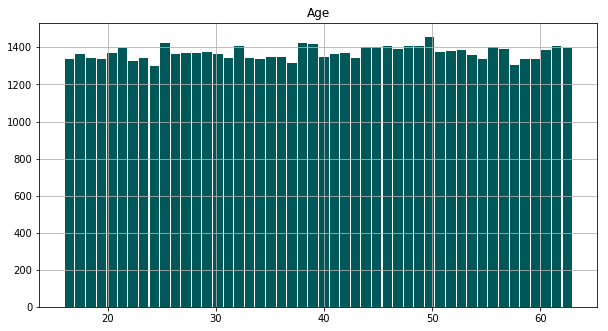

In [7]:
ax = data.hist(column='Age', bins = 48, grid=True, figsize=(10,12), layout=(2,1), sharex=True, color='#005859', rwidth=0.9)

- INSIGHT - 
- Generally uniform distribution without any notable distinctions beyond the minimum and maximum range of 16-63

- DATA PREPARATION - SPLIT INTO AGE GROUPS BY TEN YEARS

In [8]:
# Create age bins
age_bins = [15, 25, 35, 45, 55, 65]
age_labels = ['16-25', '26-35', '36-45', '46-55','56-65']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

- Total & Percent of Revenue by Age

In [9]:
# Group the data by age group and calculate total revenue
age_revenue = data.groupby('Age_Group')['Revenue_Total'].sum().reset_index()

# Calculate the percentage of total revenue generated by each age group
age_revenue['Revenue_Percentage'] = age_revenue['Revenue_Total'] / age_revenue['Revenue_Total'].sum() * 100

age_revenue['Revenue_Percentage'] = age_revenue['Revenue_Percentage'].round(2)

# Print the results
print(age_revenue)

  Age_Group  Revenue_Total  Revenue_Percentage
0     16-25       375562.3               20.58
1     26-35       376502.2               20.63
2     36-45       383389.7               21.01
3     46-55       384786.3               21.09
4     56-65       304475.7               16.69


-INSIGHT-
- The four cohorts within 16 - 55 each makeup 20.5-21.1% of company revenue. 
- Only ages 56-65 differ strongly, spending 3.8 - 4.4% less than other groups at 16.7%

Text(0.5,1,u'Revenue by Age Groups')

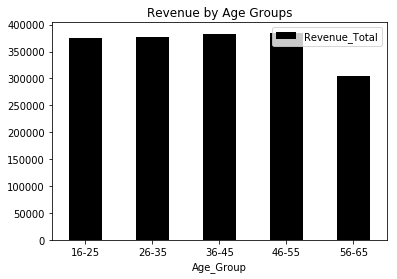

In [16]:
ay = age_revenue.plot.bar(x='Age_Group', y='Revenue_Total', rot=0, color='000000')
ay.set_title('Revenue by Age Groups')


,Age_Group,Revenue_Total,Revenue_Percentage
0,16-25,375562.3,20.58
1,26-35,376502.2,20.63
2,36-45,383389.7,21.01
3,46-55,384786.3,21.09
4,56-65,304475.7,16.69
